In [7]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
raw_dir = '../data/downloaded_raw'
out_dir = '../data/processed_dat'

sorted(os.listdir(raw_dir))

['README.md',
 'agegroup_grooms_brides.csv',
 'agegroup_grooms_brides.ods',
 'death_rate_agespecific.csv',
 'death_rate_agespecific_cleaned.csv',
 'demographic_ethnicity.csv',
 'input_birth_fertility_rates_sin_1961-2018.csv',
 'input_birth_fertility_rates_sin_1961-2018_cleaned.csv',
 'input_birth_number_by_age_1980-2018.csv',
 'input_birth_number_by_order_sin_1967-2018.csv',
 'input_lifetable_sin_2003-2017.csv',
 'input_marriage_rates_sin_1980-2017.csv',
 'input_marriage_rates_sin_1980-2017_v2.csv',
 'input_proportion_singles_age_sin_1980-2018.csv',
 'input_relationship_status_sin_1980-2018.csv',
 'inter-ethnic-marriage.csv',
 'inter-ethnic-marriage.ods',
 'mariage_by_ethnics.csv']

In [11]:
df0 = pd.read_csv(os.path.join(raw_dir, 'agegroup_grooms_brides.csv'))

In [12]:
origin_years = [1990, 2000, 2010]

Singapore minimum marriage age: at least 21, but 16-20 is OK under special licensing

-------
from [wikipedia](https://www.google.com/url?q=https://en.m.wikipedia.org/wiki/Matrimonial_law_of_Singapore&sa=U&ved=0ahUKEwiHm5TJtPjjAhVEH48KHYb_DJ8QFggPMAE&usg=AOvVaw0zJ2AIQLz1ek-zBao1PiCn):  
Couples should be of the age of 21 but the age of 16 is allowed with consent of the parents present. Marriage of bride under 16 require special licensing. The couple must by then attend the marriage counselling course by an approved provider. The certificate issued is only valid for three years.


In [14]:
age_groups = [
    'Under 20 Years',
    '20-24 Years',
    '25-29 Years',
    '30-34 Years',
    '35-39 Years',
    '40-44 Years',
    '45-49 Years',
    '50-54 Years',
    '55-59 Years',
    '60 Years & Over'
]

age_groups_2 = [list(range(16,20))]+[ list(range(i*5, i*5+5)) for i in range(4, 13) ]
age_groups_3 = [ a.replace('Under ','16-').replace(' Years','').replace(' & Over','-64') for a in age_groups ]
print(age_groups_2)
age_mid = [17.5]+[i*5+2 for i in range(4,13)]
print(age_mid)
print(age_groups_3)

[[16, 17, 18, 19], [20, 21, 22, 23, 24], [25, 26, 27, 28, 29], [30, 31, 32, 33, 34], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44], [45, 46, 47, 48, 49], [50, 51, 52, 53, 54], [55, 56, 57, 58, 59], [60, 61, 62, 63, 64]]
[17.5, 22, 27, 32, 37, 42, 47, 52, 57, 62]
['16-20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']


In [15]:
oy = origin_years[0]
df1 = df0[['Brides', 'Grooms', str(oy)]]
df1.head()

,Brides,Grooms,1990
0,Under 20 Years,Under 20 Years,56
1,Under 20 Years,20-24 Years,364
2,Under 20 Years,25-29 Years,274
3,Under 20 Years,30-34 Years,63
4,Under 20 Years,35-39 Years,4


In [16]:
pd.pivot_table(df1, index='Brides', columns='Grooms', values=str(oy))

Grooms,20-24 Years,25-29 Years,30-34 Years,35-39 Years,40-44 Years,45-49 Years,50-54 Years,55-59 Years,60 Years & Over,Under 20 Years
Brides,,,,,,,,,,
20-24 Years,2159,3762,978,201,40,6,2,0,0,12
25-29 Years,409,4171,2447,500,106,25,11,6,3,0
30-34 Years,47,390,1160,628,160,49,19,5,4,0
35-39 Years,9,50,161,298,172,61,24,9,7,0
40-44 Years,0,7,20,49,76,39,21,13,7,0
45-49 Years,0,0,4,8,9,9,17,9,6,0
50-54 Years,0,0,0,1,1,6,6,5,8,0
55-59 Years,0,0,0,0,0,0,0,2,5,0
60 Years & Over,0,0,1,0,0,0,0,0,6,0


[Text(0,0,'16-20'),
 Text(0,0,'20-24'),
 Text(0,0,'25-29'),
 Text(0,0,'30-34'),
 Text(0,0,'35-39'),
 Text(0,0,'40-44'),
 Text(0,0,'45-49'),
 Text(0,0,'50-54'),
 Text(0,0,'55-59'),
 Text(0,0,'60-64')]

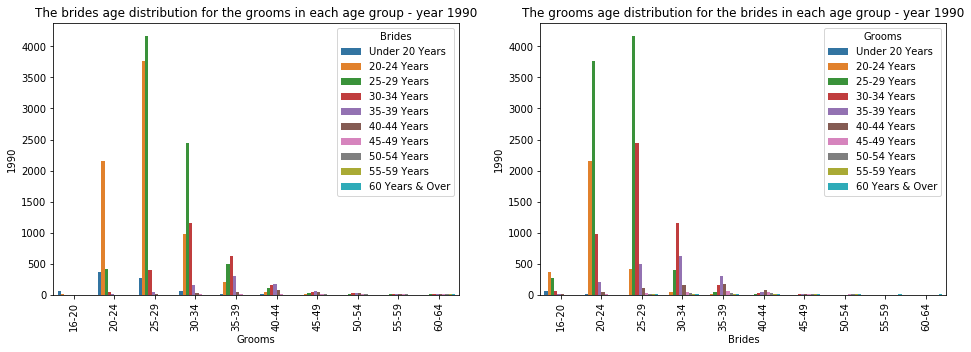

In [29]:
oy = origin_years[0]
df1 = df0[['Brides', 'Grooms', str(oy)]]

fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.barplot('Grooms', str(oy), hue='Brides', data=df1, ax=axs[0])
axs[0].set_title('The brides age distribution for the grooms in each age group - year {}'.format(oy))
axs[0].set_xticklabels(age_groups_3, rotation=90)
sns.barplot('Brides', str(oy), hue='Grooms', data=df1, ax=axs[1])
axs[1].set_title('The grooms age distribution for the brides in each age group - year {}'.format(oy))
axs[1].set_xticklabels(age_groups_3, rotation=90)

[Text(0,0,'16-20'),
 Text(0,0,'20-24'),
 Text(0,0,'25-29'),
 Text(0,0,'30-34'),
 Text(0,0,'35-39'),
 Text(0,0,'40-44'),
 Text(0,0,'45-49'),
 Text(0,0,'50-54'),
 Text(0,0,'55-59'),
 Text(0,0,'60-64')]

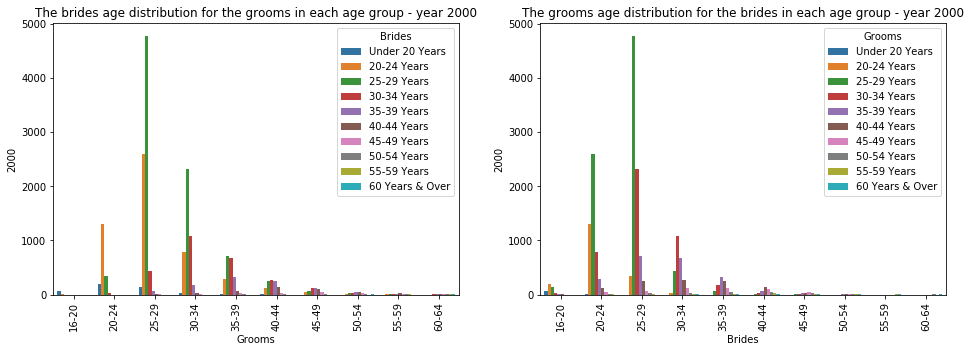

In [30]:
oy = origin_years[1]
df1 = df0[['Brides', 'Grooms', str(oy)]]

fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.barplot('Grooms', str(oy), hue='Brides', data=df1, ax=axs[0])
axs[0].set_title('The brides age distribution for the grooms in each age group - year {}'.format(oy))
axs[0].set_xticklabels(age_groups_3, rotation=90)
sns.barplot('Brides', str(oy), hue='Grooms', data=df1, ax=axs[1])
axs[1].set_title('The grooms age distribution for the brides in each age group - year {}'.format(oy))
axs[1].set_xticklabels(age_groups_3, rotation=90)

[Text(0,0,'16-20'),
 Text(0,0,'20-24'),
 Text(0,0,'25-29'),
 Text(0,0,'30-34'),
 Text(0,0,'35-39'),
 Text(0,0,'40-44'),
 Text(0,0,'45-49'),
 Text(0,0,'50-54'),
 Text(0,0,'55-59'),
 Text(0,0,'60-64')]

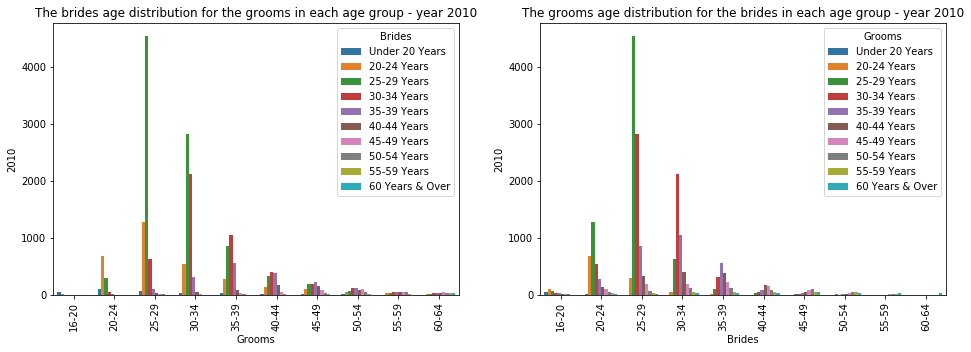

In [31]:
oy = origin_years[2]
df1 = df0[['Brides', 'Grooms', str(oy)]]

fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.barplot('Grooms', str(oy), hue='Brides', data=df1, ax=axs[0])
axs[0].set_title('The brides age distribution for the grooms in each age group - year {}'.format(oy))
axs[0].set_xticklabels(age_groups_3, rotation=90)
sns.barplot('Brides', str(oy), hue='Grooms', data=df1, ax=axs[1])
axs[1].set_title('The grooms age distribution for the brides in each age group - year {}'.format(oy))
axs[1].set_xticklabels(age_groups_3, rotation=90)

## check interpolation

In [19]:
def interpolation(midyears, popsize, target_x):
    x_news = []
    y_news = []
    for i in range(len(midyears)):
        tempx = []
        tempy = []
        if i-1>=0:
            tempx.append(midyears[i-1])
            tempy.append(popsize[i-1])
        else:
            tempx.append(13.5)
            tempy.append(0)
        tempx.append(midyears[i])
        tempy.append(popsize[i])
        if i+1<=len(midyears)-1:
            tempx.append(midyears[i+1])
            tempy.append(popsize[i+1])
        else:
            tempx.append(67)
            tempy.append(0)
            
        z = np.polyfit(tempx, tempy, 1)
        f = np.poly1d(z)
        
        x_new = target_x[i]
        y_new = f(x_new)
        y_new_sum = float(sum(y_new))
        if y_new_sum==0: 
            y_new2 = [0.]*len(y_new)
        else:
            y_new2 = [ y*popsize[i]/y_new_sum for y in y_new ]
        x_news.extend(x_new)
        y_news.extend(y_new2)
    #miny = abs(min(y_news))
    #y_news = [ y+miny for y in y_news ]
    return x_news, y_news


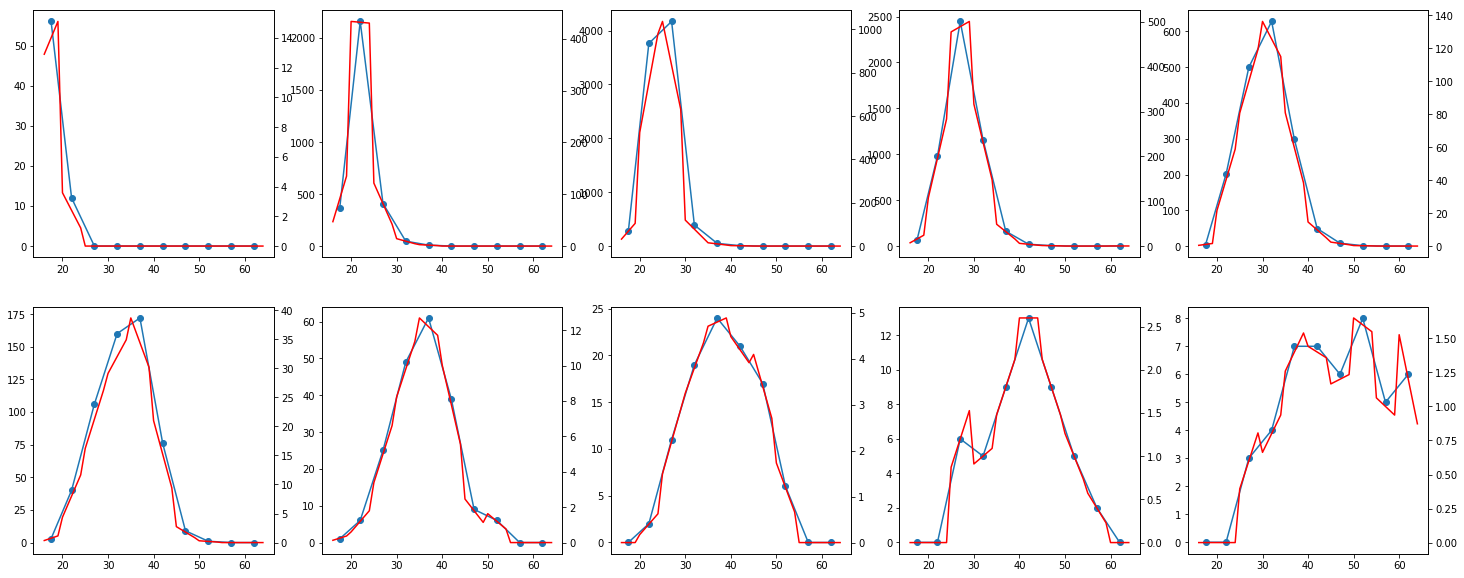

In [32]:
oy = origin_years[0]
df1 = df0[['Brides', 'Grooms', str(oy)]]

fig, axg = plt.subplots(2, 5, figsize=(25,10))
axs = axg.flatten()
k = 0
from_g = {}
for g_a in age_groups:
    ax = axs[k]
    temp_g = df1[df1['Grooms']==g_a]
    temp_g = temp_g[['Brides', str(oy)]]
    temp_g = temp_g.set_index('Brides')
    temp_dic = temp_g.to_dict(orient='index')
    #print(temp_g)
    temp_list = [ temp_dic[ag][str(oy)] for ag in age_groups ]
    #print(temp_list)
    ages, age_dist = interpolation(age_mid, temp_list, age_groups_2)
    
    a_zip = { a:c for a,c in zip(ages, age_dist) }
    checking = []
    for ag in age_groups_2:
        cs = 0
        for a in ag:
            c = a_zip[a]
            cs+=c
        checking.append(cs)
    from_g[g_a] = a_zip
    
    #print(age_dist)
    ax.scatter(age_mid, temp_list)
    #ax.plot(ages, age_dist)
    ax.plot(age_mid, checking)
    
    ax2 = ax.twinx()
    ax2.plot(ages, age_dist, c='r')
    k+=1
    #break
    

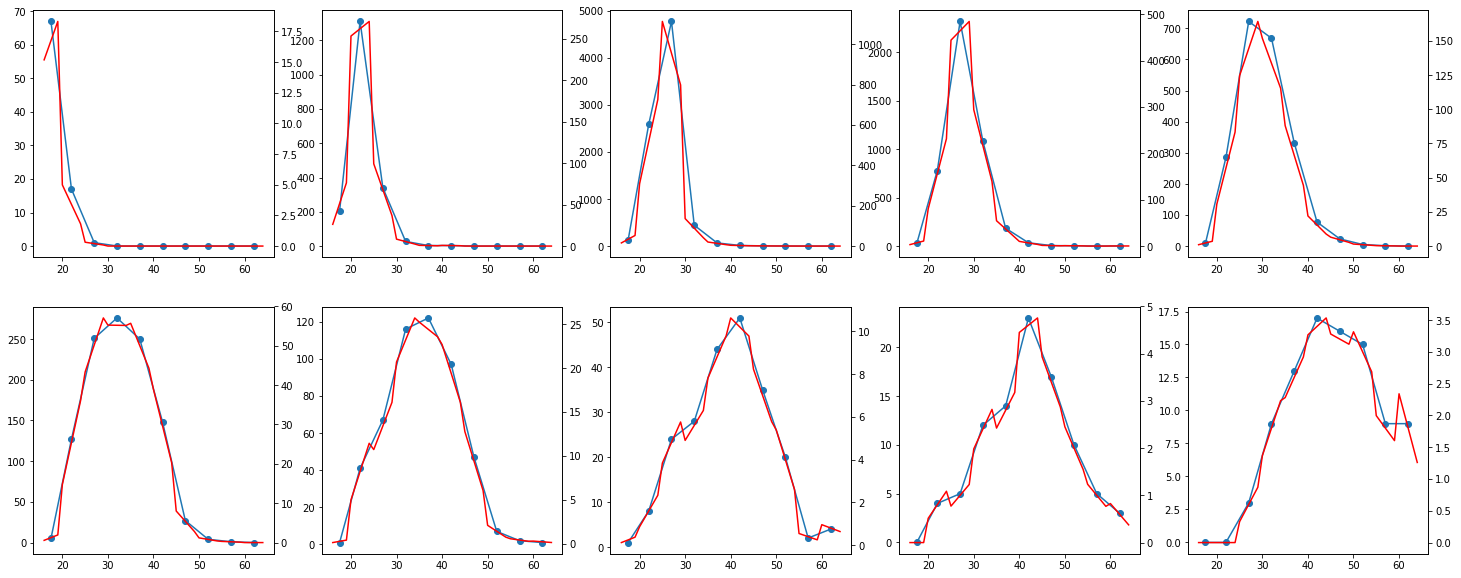

In [33]:
oy = origin_years[1]
df1 = df0[['Brides', 'Grooms', str(oy)]]

fig, axg = plt.subplots(2, 5, figsize=(25,10))
axs = axg.flatten()
k = 0
from_g = {}
for g_a in age_groups:
    ax = axs[k]
    temp_g = df1[df1['Grooms']==g_a]
    temp_g = temp_g[['Brides', str(oy)]]
    temp_g = temp_g.set_index('Brides')
    temp_dic = temp_g.to_dict(orient='index')
    #print(temp_g)
    temp_list = [ temp_dic[ag][str(oy)] for ag in age_groups ]
    #print(temp_list)
    ages, age_dist = interpolation(age_mid, temp_list, age_groups_2)
    
    a_zip = { a:c for a,c in zip(ages, age_dist) }
    checking = []
    for ag in age_groups_2:
        cs = 0
        for a in ag:
            c = a_zip[a]
            cs+=c
        checking.append(cs)
    from_g[g_a] = a_zip
    
    #print(age_dist)
    ax.scatter(age_mid, temp_list)
    #ax.plot(ages, age_dist)
    ax.plot(age_mid, checking)
    
    ax2 = ax.twinx()
    ax2.plot(ages, age_dist, c='r')
    k+=1
    #break
    

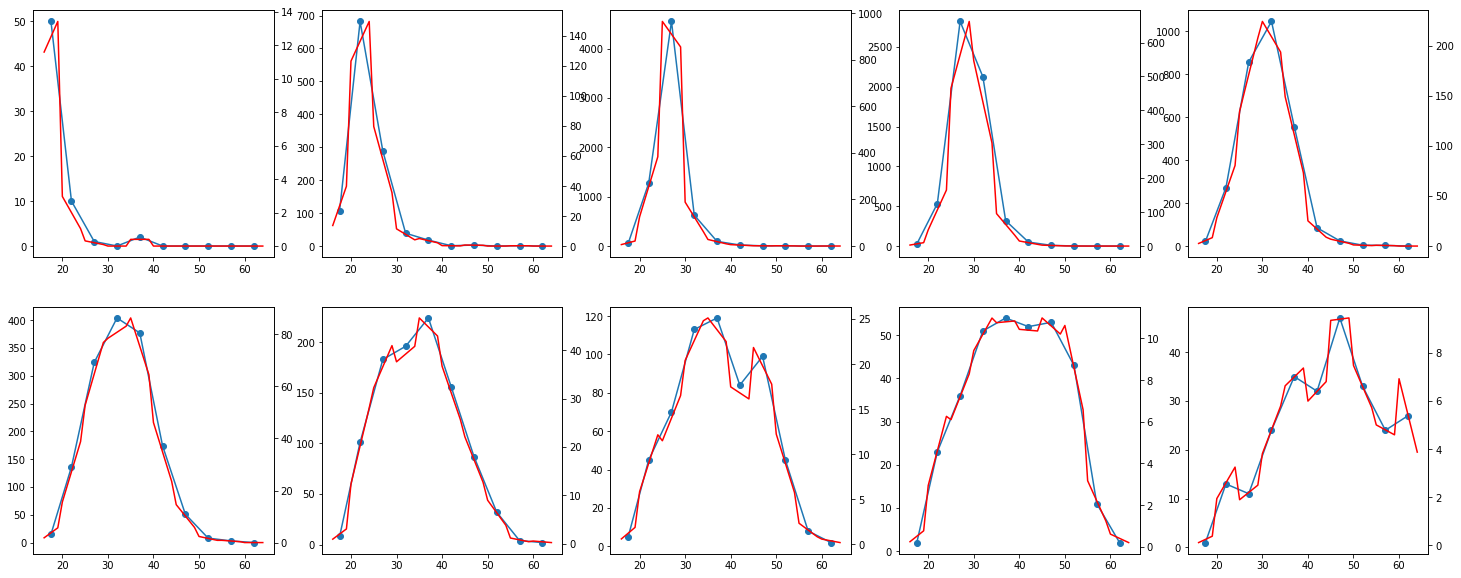

In [34]:
oy = origin_years[2]
df1 = df0[['Brides', 'Grooms', str(oy)]]
oy = origin_years[2]
df1 = df0[['Brides', 'Grooms', str(oy)]]

fig, axg = plt.subplots(2, 5, figsize=(25,10))
axs = axg.flatten()
k = 0
from_g = {}
for g_a in age_groups:
    ax = axs[k]
    temp_g = df1[df1['Grooms']==g_a]
    temp_g = temp_g[['Brides', str(oy)]]
    temp_g = temp_g.set_index('Brides')
    temp_dic = temp_g.to_dict(orient='index')
    #print(temp_g)
    temp_list = [ temp_dic[ag][str(oy)] for ag in age_groups ]
    #print(temp_list)
    ages, age_dist = interpolation(age_mid, temp_list, age_groups_2)
    
    a_zip = { a:c for a,c in zip(ages, age_dist) }
    checking = []
    for ag in age_groups_2:
        cs = 0
        for a in ag:
            c = a_zip[a]
            cs+=c
        checking.append(cs)
    from_g[g_a] = a_zip
    
    #print(age_dist)
    ax.scatter(age_mid, temp_list)
    #ax.plot(ages, age_dist)
    ax.plot(age_mid, checking)
    
    ax2 = ax.twinx()
    ax2.plot(ages, age_dist, c='r')
    k+=1
    #break
    

## calculate age differences between brides and groooms

In [12]:
df1.head()

,Brides,Grooms,1990
0,Under 20 Years,Under 20 Years,56
1,Under 20 Years,20-24 Years,364
2,Under 20 Years,25-29 Years,274
3,Under 20 Years,30-34 Years,63
4,Under 20 Years,35-39 Years,4


In [35]:
def interpolation(midyears, popsize, target_x):
    x_news = []
    y_news = []
    for i in range(len(midyears)):
        tempx = []
        tempy = []
        if i-1>=0:
            tempx.append(midyears[i-1])
            tempy.append(popsize[i-1])
        else:
            tempx.append(13.5)
            tempy.append(0)
        tempx.append(midyears[i])
        tempy.append(popsize[i])
        if i+1<=len(midyears)-1:
            tempx.append(midyears[i+1])
            tempy.append(popsize[i+1])
        else:
            tempx.append(67)
            tempy.append(0)
            
        z = np.polyfit(tempx, tempy, 1)
        f = np.poly1d(z)
        
        x_new = target_x[i]
        y_new = f(x_new)
        y_new_sum = float(sum(y_new))
        if y_new_sum==0: 
            y_new2 = [0.]*len(y_new)
        else:
            y_new2 = [ y*popsize[i]/y_new_sum for y in y_new ]
        x_news.extend(x_new)
        y_news.extend(y_new2)
    #miny = abs(min(y_news))
    #y_news = [ y+miny for y in y_news ]
    return x_news, y_news


In [39]:

def get_distribution(df1, oy):
    from_g = {}
    from_b = {}
    for g_a in age_groups:
        temp_g = df1[df1['Grooms']==g_a]
        temp_g = temp_g[['Brides', str(oy)]]
        temp_g = temp_g.set_index('Brides')
        temp_g_dic = temp_g.to_dict(orient='index')
        temp_g_list = [ temp_g_dic[ag][str(oy)] for ag in age_groups ]
        ages_g, age_dist_g = interpolation(age_mid, temp_g_list, age_groups_2)
        a_zip_g = { a:c for a,c in zip(ages_g, age_dist_g) }
        grouping_g = []
        for ag in age_groups_2:
            cs = {}
            for a in ag:
                cs[a] = a_zip_g[a]
            grouping_g.append(cs)
        from_g[g_a] = { a:c for a,c in zip(age_groups, grouping_g) }

        temp_b = df1[df1['Brides']==g_a]
        temp_b = temp_b[['Grooms', str(oy)]]
        temp_b = temp_b.set_index('Grooms')
        temp_b_dic = temp_b.to_dict(orient='index')
        temp_b_list = [ temp_b_dic[ag][str(oy)] for ag in age_groups ]
        ages_b, age_dist_b = interpolation(age_mid, temp_b_list, age_groups_2)
        a_zip_b = { a:c for a,c in zip(ages_b, age_dist_b) }
        grouping_b = []
        for ag in age_groups_2:
            cs = {}
            for a in ag:
                cs[a] = a_zip_b[a]
            grouping_b.append(cs)
        from_b[g_a] = { a:c for a,c in zip(age_groups, grouping_b) }
    return from_g, from_b

In [40]:
oy = origin_years[2]
df1 = df0[['Brides', 'Grooms', str(oy)]]
from_g, from_b = get_distribution(df1, oy)

In [43]:
oy = origin_years[0]
df1 = df0[['Brides', 'Grooms', str(oy)]]
from_g, from_b = get_distribution(df1, oy)
min_v = 100
for k,v in from_g.items():
    #print(k,v)
    for k2, v2 in v.items():
        #print(v2)
        for k3, v3 in v2.items():
            if v3<min_v:
                min_v = v3
        #print(k2, v2)
print('----', min_v)
oy = origin_years[1]
df1 = df0[['Brides', 'Grooms', str(oy)]]
from_g, from_b = get_distribution(df1, oy)
min_v = 100
for k,v in from_g.items():
    #print(k,v)
    for k2, v2 in v.items():
        #print(v2)
        for k3, v3 in v2.items():
            if v3<min_v:
                min_v = v3
        #print(k2, v2)
print('----', min_v)
oy = origin_years[2]
df1 = df0[['Brides', 'Grooms', str(oy)]]
from_g, from_b = get_distribution(df1, oy)
min_v = 100
for k,v in from_g.items():
    #print(k,v)
    for k2, v2 in v.items():
        #print(v2)
        for k3, v3 in v2.items():
            if v3<min_v:
                min_v = v3
        #print(k2, v2)
print('----', min_v)

---- 0.0
---- 0.0
---- 0.0


In [48]:
def sampling_from(adic):
    ages = sorted(adic.keys())
    #print(ages)
    total = sum([ v for k,v in adic.items() ])
    cumsum = [adic[ages[0]]/total]
    for a in ages[1:]:
        cumsum.append(adic[a]/total+cumsum[-1])
    #print(cumsum)
    r = random.random()
    k = 0
    while not(r<cumsum[k]): k+=1
    return ages[k]

year 1990

In [62]:


def get_age_diff(oy):
    df1 = df0[['Brides', 'Grooms', str(oy)]]
    from_g, from_b = get_distribution(df1, oy)
    
    sim_dic = {}
    for g in range(16,65):
        for b in range(16,65):
            sim_dic[(g,b)] = 0
    
    temp_pivot = pd.pivot_table(df1, index='Grooms', columns='Brides', values=str(oy))
    dic_1 = temp_pivot.to_dict(orient='index')

    brides = []
    grooms = []
    age_diff = []
    for groom,v in dic_1.items():
        for bride, num in v.items():
            #print(groom, bride, num)
            if num>0:
                choosing_bride = from_g[groom][bride]
                choosing_groom = from_b[bride][groom]
                #print(choosing_bride, choosing_groom)
                #print(num)
                bs = []
                gs = []
                for i in range(num):
                    b = sampling_from(choosing_bride)
                    bs.append(b)
                    g = sampling_from(choosing_groom)
                    gs.append(g)
                    sim_dic[(g,b)]+=1
                    age_diff.append(b-g)
            brides.append(bs)
            grooms.append(gs)
    mean = np.mean(age_diff)
    std = np.std(age_diff)
    return mean, std, age_diff

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-3.153926319628993 4.625877677704444


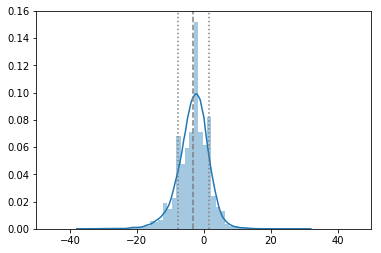

In [75]:

oy = origin_years[0]
mean, std, age_diff = get_age_diff(oy)
ax = sns.distplot(age_diff)
ax.axvline(x=mean, ls='--', c='grey')
ax.axvline(x=mean+std, ls=':', c='grey')
ax.axvline(x=mean-std, ls=':', c='grey')
ax.set_xlim([-50,50])
print( mean, std)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-3.4580053908355795 5.499339760417611


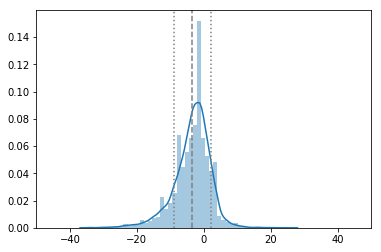

In [76]:

oy = origin_years[1]
mean, std, age_diff = get_age_diff(oy)
ax = sns.distplot(age_diff)
ax.axvline(x=mean, ls='--', c='grey')
ax.axvline(x=mean+std, ls=':', c='grey')
ax.axvline(x=mean-std, ls=':', c='grey')
ax.set_xlim([-50,50])
print( mean, std)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-3.9231339594661394 6.733745274584136


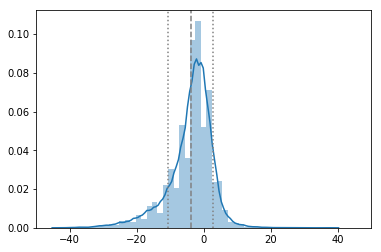

In [77]:

oy = origin_years[2]
mean, std, age_diff = get_age_diff(oy)
ax = sns.distplot(age_diff)
ax.axvline(x=mean, ls='--', c='grey')
ax.axvline(x=mean+std, ls=':', c='grey')
ax.axvline(x=mean-std, ls=':', c='grey')
ax.set_xlim([-50,50])
print( mean, std)

In [80]:

out = {}
for oy in origin_years:
    mean, std, age_diff = get_age_diff(oy)
    out[oy] = dict(year=oy, mean=mean, std=std)
out_df = pd.DataFrame.from_dict(out, orient='index')
out_df = out_df[['year', 'mean', 'std']]
print(out_df)
out_df.to_csv(os.path.join(out_dir, 'couple_age_diff_3years.csv'))

      year      mean       std
1990  1990 -3.134230  4.642491
2000  2000 -3.439892  5.463688
2010  2010 -3.916312  6.710765
